In [102]:
import numpy as np
import matplotlib.pyplot as plt



def Fourier_Mapping(Ekxy, kx, ky, k, z, xlim=None, ylim=None):
    # Create 2D grids
    KX, KY = np.meshgrid(kx, ky)

    # Transfer function
    H = np.exp(-0.5j * (KX**2 + KY**2) * z / k)  # Example transfer function
    Ekxyz = Ekxy * H   # Apply transfer function
    Exyz = np.fft.ifft2(Ekxyz)  # Inverse Fourier transform to get spatial domain
    Exyz = np.fft.fftshift(Exyz)  # Shift zero-frequency component to center
    x = np.fft.fftshift(np.fft.fftfreq(len(kx), d=(kx[1] - kx[0])))
    y = np.fft.fftshift(np.fft.fftfreq(len(ky), d=(ky[1] - ky[0])))
    X, Y = np.meshgrid(x,y)  # Create meshgrid for plotting

    # Now KX and KY are 2D arrays representing the grid
    plt.figure(figsize=(8, 6))
    plt.pcolormesh(X, Y, np.abs(Exyz), shading='auto', cmap='viridis')
    plt.xlim(xlim if xlim is not None else (x.min(), x.max()))
    plt.ylim(ylim if ylim is not None else (y.min(), y.max()))
    plt.colorbar(label='Energy (Ekxy)')
    plt.title('Fourier Mapping of Ekxy')
    return X, Y, Exyz

def plot_along_x_or_y_axis(X, Y, Exy, xlim=None, ylim=None):
    mid_idx = Exy.shape[0] // 2
    # Plot along x-axis
    plt.figure(figsize=(12, 6))
    
    plt.subplot(1, 2, 1)
    plt.plot(X[0, :], np.abs(Exy[mid_idx, :]), label='Along x-axis')
    if xlim is not None:
        plt.xlim(xlim)
    plt.title('Profile along x-axis')
    plt.xlabel('x')
    plt.ylabel('Amplitude')
    plt.legend()
    
    # Plot along y-axis
    plt.subplot(1, 2, 2)
    plt.plot(Y[:, 0], np.abs(Exy[:, mid_idx]), label='Along y-axis', color='orange')
    if ylim is not None:
        plt.xlim(ylim)
    plt.title('Profile along y-axis')
    plt.xlabel('y')
    plt.ylabel('Amplitude')
    plt.legend()
    
    plt.tight_layout()
    plt.show()

Rayleigh range z0: 0.05


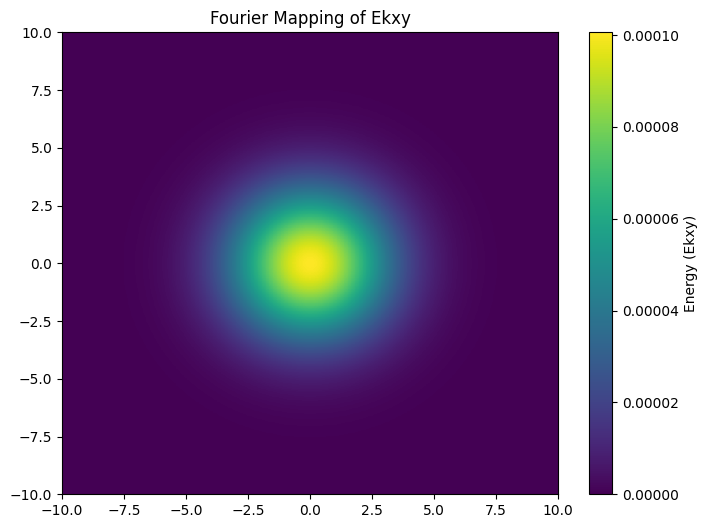

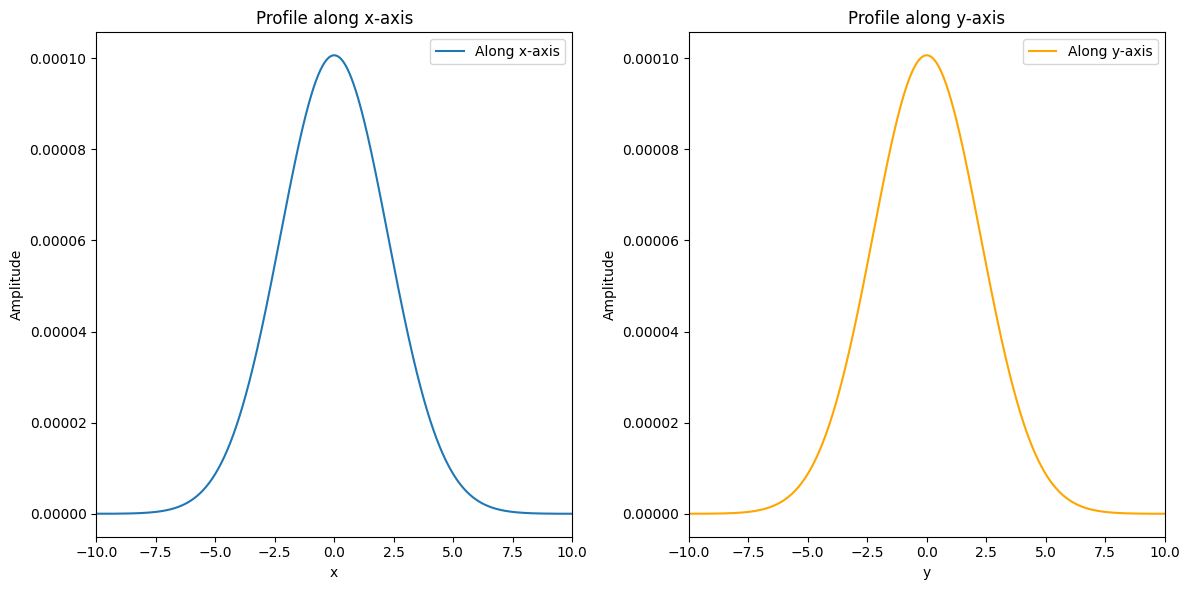

In [121]:
N = 1000 # Spatial Resolution
klim = 5 * np.pi  # Limit for kx and ky
kx = np.linspace(-klim, klim, N)
ky = np.linspace(-klim, klim, N)
xrange = 10
yrange = 10

# Example parameters for the beam waist and energy function
w0 = 1  # Example beam waist
Ekxy = w0**2 /np.pi * np.exp(-w0**2 * (kx[:, None]**2 + ky[None, :]**2))  # Example energy function
k = 0.1  # Example wave number
z = 2  # Example propagation distance
z0 =  k*w0**2/2 # Rayleigh range
print(f"Rayleigh range z0: {z0}")
X, Y, Exyz = Fourier_Mapping(Ekxy, kx, ky, k, z, xlim=(-xrange, xrange), ylim=(-yrange, yrange))

# Plot the results

plot_along_x_or_y_axis(X, Y, Exyz, xlim=(-xrange, xrange), ylim=(-yrange, yrange))

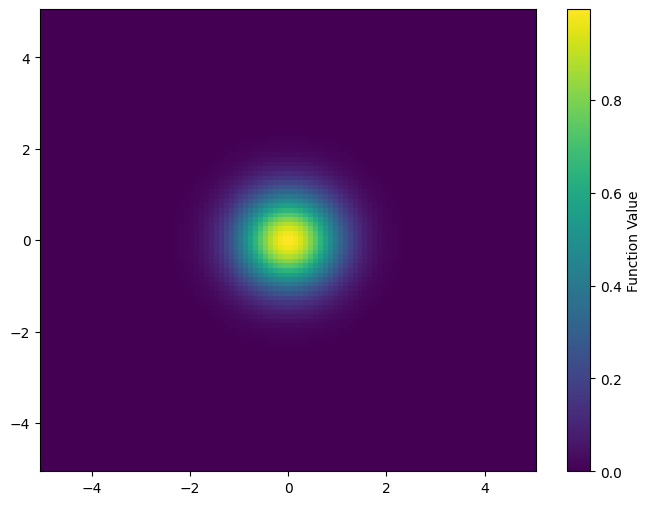

In [89]:
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)
fxy = np.exp(-X**2 - Y**2)  # Example function for x and y axes

plt.figure(figsize=(8, 6))
plt.pcolormesh(X, Y, fxy, shading='auto', cmap='viridis')
plt.colorbar(label='Function Value')